# Introducción a Julia y Jupyter-notebook

El texto canónico es el manual de Julia: http://docs.julialang.org/en/release-0.5/

[Julia](http://julialang.org/) es un lenguaje concebido para hacer cómputo científico, y por gente que tiene experiencia en eso. Incorpora muchos elementos modernos del diseño de lenguajes de cómputo.

Por ejemplo, cosas como "pi" y kron (producto de kronecker) están definidas.

Uso de Jupyter-notebook
============================

Jupyter es una herramienta muy util para desarrollar código de Julia y Python, entre muchos otros lenguajes. Tiene elementos que recuerdan los notebooks de Mathematica.

Modo Esc:
----------------------

* Presionando "a"/"b" abre una celda arriba arriba/abajo __above/bottom__ de la que actualmente esta seleccionada.

* presionando "d" dos veces se borra la celda seleccionada.

* "m" cambia la celda a Markdown

Presionando Enter se cambia al modo de edición de celda
------------------------------------------------------------

* Las celdas se evaluan con "shift+Enter" (como en mathematica, solo que aqui no funciona el Intro)

* Las celdas aceptan diversos lenguajes tales como `MarkDown`, el mismo lenguaje en el que fue escrita esta celda.

* El notebook permite varios modos interesantes, por ej. presionando ctrl y haciendo click con el mouse en diferentes partes del codigo, el notebook nos brinda muchos cursores.




## Instalacion y uso de paqueterias de Julia

* El comando Pkg.update() actualiza la información de los repositorios de Julia.
* Pkg.add("Nombre del paquete") instala el paquete deseado (mientras éste este en la lista http://pkg.julialang.org/), por ejemplo, si queremos instalar PyPlot para poder hacer graficas:

In [1]:
# Pkg.update() # Actualiza la lista de paquetes de Julia.

In [2]:
# Pkg.add("PyPlot") # mas adelante lo usaremos, mientras tanto podemos llamarlo:

In [3]:
using PyPlot # Justo despues de instalarlo la primera vez, julia tiene que compilarlo.

INFO: Installing PyQt5 via Anaconda's /home/david/anaconda3/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/david/anaconda3:
#
pyqt                      4.11.4                   py34_4  


# Esturcturas basicas

## bucles y expresiones condicionales

In [4]:
# for simple
for i in -1:3
    println(i)
end

-1
0
1
2
3


In [5]:
typeof(-1:3)

UnitRange{Int64}

In [6]:
i # i es una variable local

LoadError: UndefVarError: i not defined

In [7]:
for i in 1:3
    x = i
    println(x)
end

1


In [8]:
x # es local también

LoadError: UndefVarError: x not defined

In [9]:
x = 0
for i in 1:2:10
    x = i
    println(x)
end

1
3
5
7
9


In [10]:
x #Aqui ya no es local, está definida como global, pues se definió fuera del bucle.

9

In [11]:
for ib = (true, false)
    for jb = (true,false)
        println( "$ib & $jb = ", ib & jb)
        println( "$ib | $jb = ", ib | jb)
    end
end

true & true = true

* While

In [12]:
i=0;
while i <= 5
         println(i)
         i += 1
       end

0
1
2
3
4
5


* If

In [13]:
y=5;
x=6;
if x < y
  println("x is less than y")
elseif x > y
  println("x is greater than y")
else
  println("x is equal to y")
end

x is greater than y


## Creacion de funciones

In [14]:
# Calculo del volumen de una esfera de radio r
function sphere_vol(r)
    return 4/3*pi*r^3
end

sphere_vol (generic function with 1 method)

In [15]:
sphere_vol(1)

4.1887902047863905

### Ejemplo : Método de Newton para calcular raices cuadradas (Método Babilónico)

* Para calcular la raiz cuadrada de $S$ un método bastante conocido es el de los Babilonios (derivable del método de newton para buscar ceros). El algoritmo puede ser presentado como un sistema dinámico discreto:
$$x_{n+1}=\frac{1}{2} \left( x_n+\frac{S}{x_n} \right), \hspace{5 pt} \lim_{n\to\infty} x_n\to \sqrt{S}.$$
Donde $x_0$ es una condicion inicial cualquiera, finita y acotada. Típicamente uno escoge una buena condicion inicial para que el metodo converja rapido.

In [16]:
"""
Esta función calcula la raiz cuadrada
"""
function sqrt_root(S)
    x=S/2;
    for i in 1:20
       x=0.5(x+S/x)
    end
    return x
end

sqrt_root

In [17]:
sqrt_root(2)

1.414213562373095

* Podemos mirar la documentación que agregamos a nuestra función como cualquier otra función de Julia:

In [18]:
?sqrt_root

search:



Esta función calcula la raiz cuadrada


## Graficas usando PyPlot: Ejemplo 1

In [19]:
x=linspace(-10,10,1000);
y=cos(x);

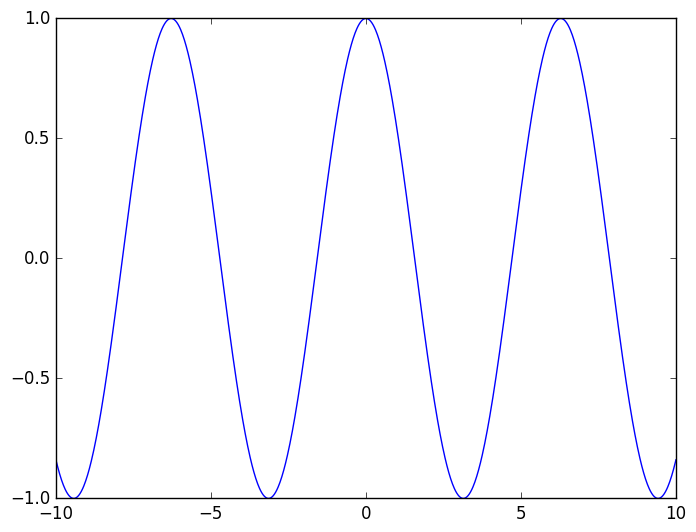

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f59f23b90f0>

In [20]:
plot(x,y) # la sintaxis es muy parecida a matlab

* matplotlib brinda mas opciones:

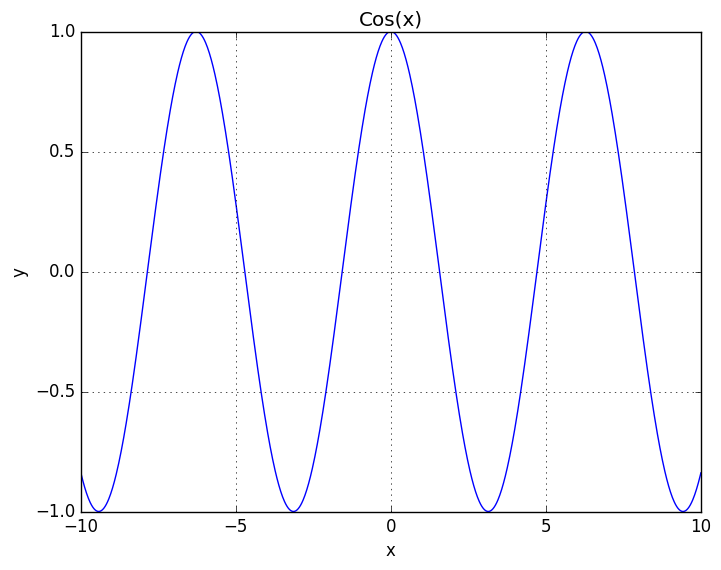

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f59f2338978>

In [21]:
xlabel("x")
ylabel("y")
title("Cos(x)")
grid("on")
plot(x,y)

## Graficas usando PyPlot: Ejemplo 2

En este ejemplo se muestra como converge el metodo de los babilonios a la raiz cuadrada deseada.

In [22]:
list=zeros(30);
S=10000;
x=0.0001;
for i in 1:30
    x=0.5(x+S/x);
    list[i]=x;
end

In [23]:
x=linspace(0,35,100);
y=S*ones(length(x));

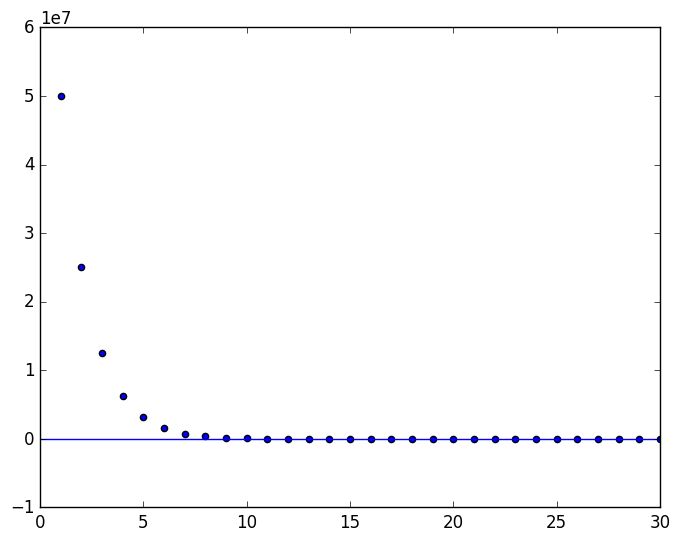

In [24]:
scatter(1:30,list);
plot(x,y);
xlim(0,30);

# Tarea

* Graficar el diagrama de bifurcaciones del mapeo logístico $x_{x+1}=r x_n(1-x_n)$. La tarea es un notebook que contiene las instrucciones para graficar el sistema.
Bibliografía: https://en.wikipedia.org/wiki/Logistic_map

# Para la siguiente iteracion